In [1]:
import tensorflow as tf
from tensorflow import keras

In [247]:
class_names = ["T-shirt/top","Trouser","Pullover",
               "Dress","Coat","Sandal","Shirt","Sneaker",
               "Bag","Ankle Boot"]

In [404]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [405]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [406]:
input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)
num_classes = len(np.unique(y_train)) 

In [407]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [438]:
input_ = keras.layers.Input(shape = input_shape)
batchnorm1 = keras.layers.BatchNormalization()(input_)
hidden1 =  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(batchnorm1)
hidden2 = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(hidden1)
dropout1 = keras.layers.Dropout(0.25)(hidden2)
flatten = keras.layers.Flatten()(dropout1)
layer3 = keras.layers.Dense(units=128, activation='relu')(flatten)
dropout2 = keras.layers.Dropout(0.2)(layer3)
flatten_input = keras.layers.Flatten()(input_)
flatten_input_dense = keras.layers.Dense(units=128, activation='relu')(flatten_input)
concat = keras.layers.Concatenate()([flatten,flatten_input_dense])
output = keras.layers.Dense(units=num_classes, activation='softmax')(concat)
model = keras.Model(inputs = [input_],outputs = [output]) 

In [439]:
model.summary()

Model: "model_51"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_85 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 batch_normalization_131 (Batch  (None, 28, 28, 1)   4           ['input_85[0][0]']               
 Normalization)                                                                                   
                                                                                                  
 conv2d_26 (Conv2D)             (None, 26, 26, 32)   320         ['batch_normalization_131[0][0]']
                                                                                                  
 conv2d_27 (Conv2D)             (None, 24, 24, 64)   18496       ['conv2d_26[0][0]']       

In [440]:
model.compile(loss= "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [441]:
history = model.fit(np.expand_dims(x_train, -1), y_train, batch_size=128, epochs=3, validation_split=0.3)

Epoch 1/3
329/329 [==============================] - 135s 359ms/step - loss: 0.4428 - accuracy: 0.8416 - val_loss: 0.3531 - val_accuracy: 0.8811
Epoch 2/3
329/329 [==============================] - 115s 349ms/step - loss: 0.2854 - accuracy: 0.8966 - val_loss: 0.2842 - val_accuracy: 0.8991
Epoch 3/3
329/329 [==============================] - 115s 350ms/step - loss: 0.2280 - accuracy: 0.9167 - val_loss: 0.2652 - val_accuracy: 0.9071


In [442]:
loss, accuracy = model.evaluate(np.expand_dims(x_test, -1), y_test, verbose=0)
print(loss, accuracy)

0.2740049660205841 0.9021999835968018


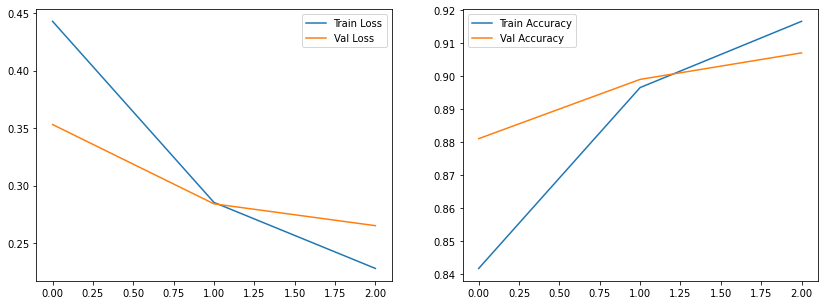

In [443]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
ax2.legend()